## DNN Example for Fashion MNIST Dataset

In [2]:
pip install keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 8.5 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 305.0 kB/s eta 0:00:02
   ------------------------------ --------- 1.0/1.4 MB 406.0 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 542.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 3.9/376.0 MB 9.4 MB/s eta 0:00:40
    --------------------------------------- 5.8/376.0 MB 9.3 MB/s eta 0:00:40
    --------------------------------------- 7.6/376.0 MB 9.2 MB/s eta 0:00:40
   - -------------------------------------- 9.7/376.0 MB 9.1 MB/s eta 0:00:41
   - -------------------------------------- 11.5/376.0 MB 9.2 MB/s eta 0:00:40
   - -------------------------------------- 13.4/376.0 MB 9.1 MB/s eta 0:00:40
   - -------------------------------------- 15.2/376.0 MB 9.0 MB/s eta 0:00:41
   - -------------------------------------- 17.0/376.0 MB 9.1 MB/s eta 0:00:40
   -- ------------------------------------- 18.9/376.0 MB 9.0 MB/s eta 0:00:40
   -- ------------------------------------- 20.7/376.0 MB 9.0 MB/s eta 0:00:40
   -- ------------------------------------- 22.5/376.0 MB 9.0 MB

In [2]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip uninstall tensorflow tensorflow-gpu tflite-runtime -y


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [4]:
pip cache purge


Files removed: 98
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow==2.15


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.15


In [1]:
pip install tensorflowen ni

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 1s 25us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

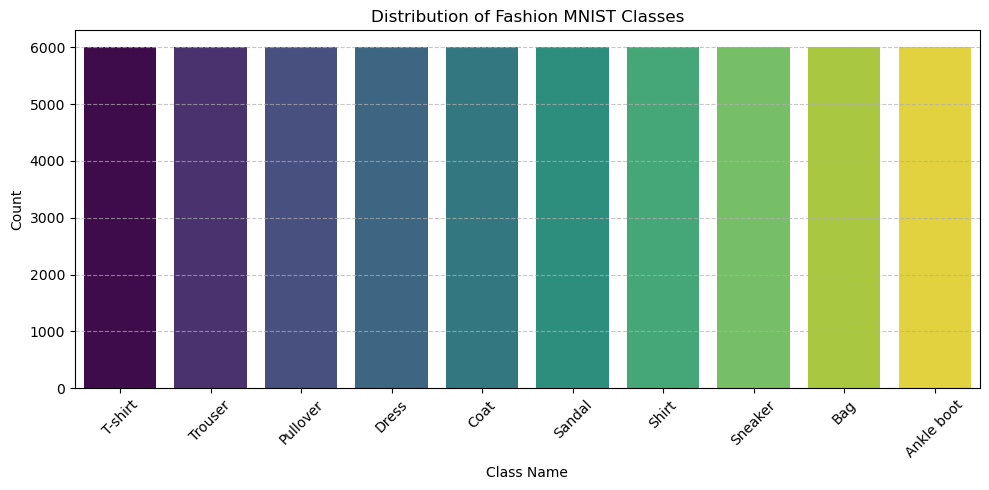

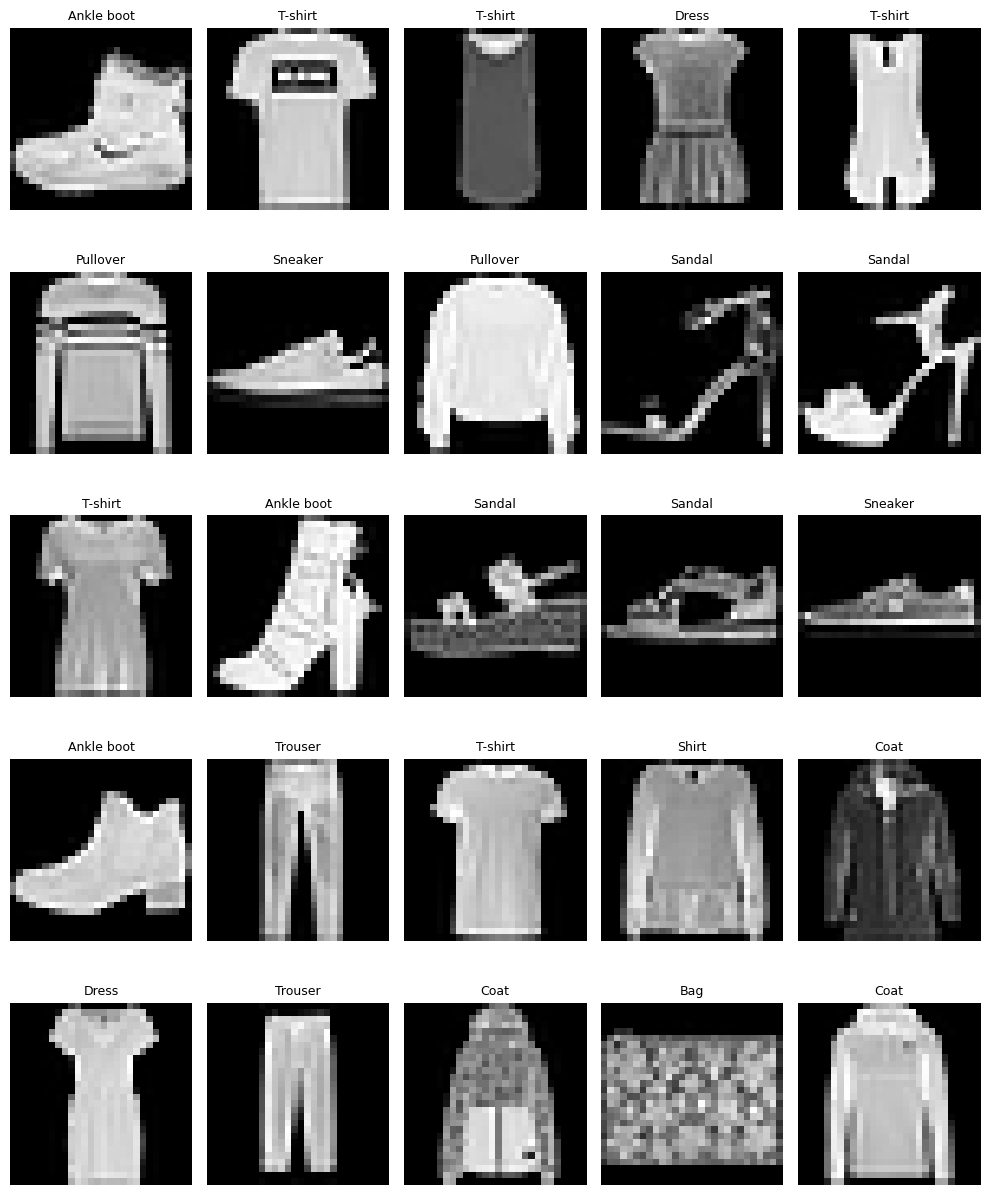

In [5]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [6]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [7]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [8]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [10]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 7s - 19ms/step - accuracy: 0.7780 - loss: 0.6483 - val_accuracy: 0.8401 - val_loss: 0.4493
Epoch 2/20
375/375 - 5s - 13ms/step - accuracy: 0.8397 - loss: 0.4458 - val_accuracy: 0.8662 - val_loss: 0.3710
Epoch 3/20
375/375 - 5s - 12ms/step - accuracy: 0.8548 - loss: 0.4028 - val_accuracy: 0.8651 - val_loss: 0.3623
Epoch 4/20
375/375 - 5s - 14ms/step - accuracy: 0.8645 - loss: 0.3768 - val_accuracy: 0.8654 - val_loss: 0.3623
Epoch 5/20
375/375 - 6s - 15ms/step - accuracy: 0.8711 - loss: 0.3580 - val_accuracy: 0.8767 - val_loss: 0.3418
Epoch 6/20
375/375 - 5s - 13ms/step - accuracy: 0.8748 - loss: 0.3440 - val_accuracy: 0.8759 - val_loss: 0.3441
Epoch 7/20
375/375 - 5s - 12ms/step - accuracy: 0.8782 - loss: 0.3309 - val_accuracy: 0.8853 - val_loss: 0.3225
Epoch 8/20
375/375 - 5s - 13ms/step - accuracy: 0.8832 - loss: 0.3218 - val_accuracy: 0.8840 - val_loss: 0.3210
Epoch 9/20
375/375 - 5s - 14ms/step - accuracy: 0.8875 - loss: 0.3104 - val_accuracy: 0.8782 - val_loss:

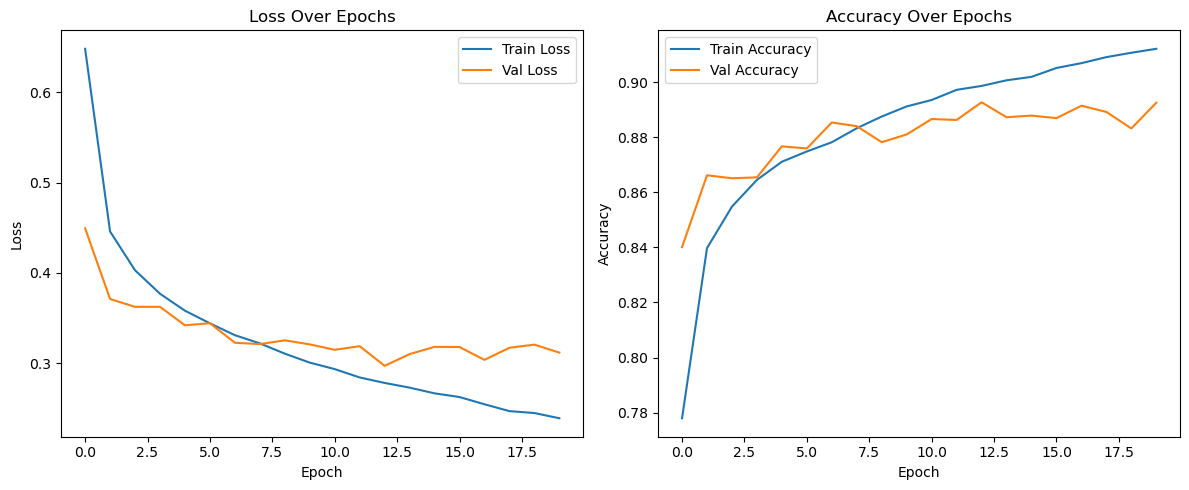

In [11]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [12]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8846


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


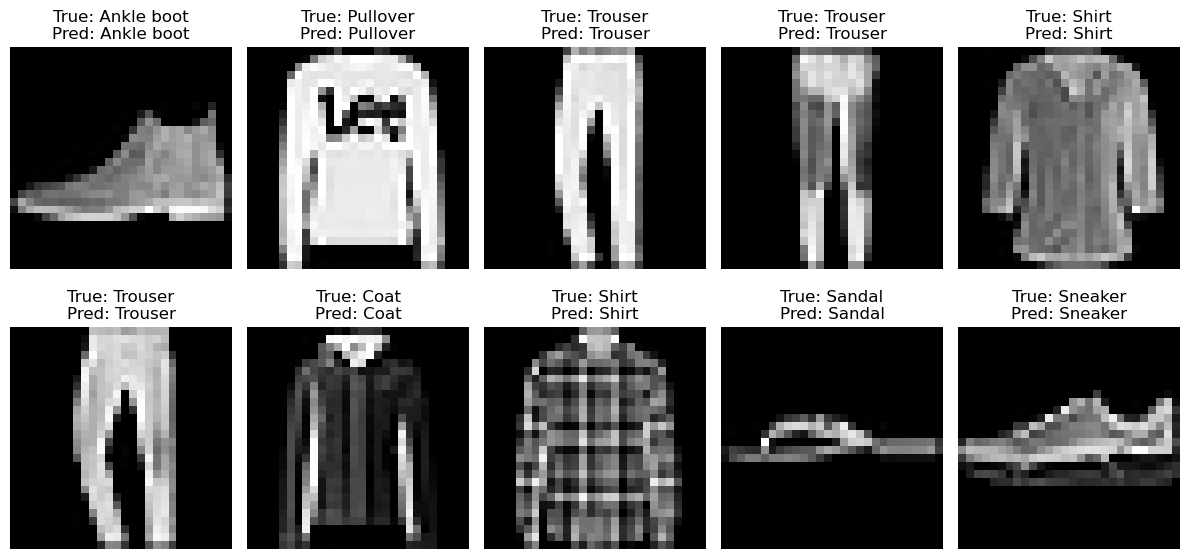

In [13]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

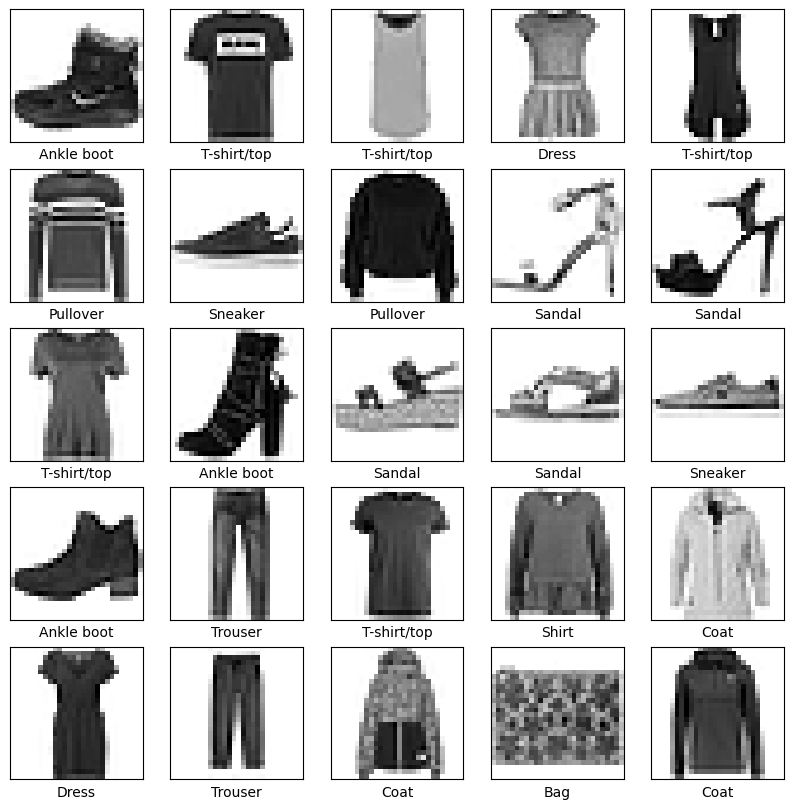

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [15]:
# Standard DNN Model
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

# ResNet-style DNN Model (with residual connections)
def create_resnet_dnn():
    inputs = Input(shape=(784,))
    
    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)
    
    # Residual block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation('relu')(res1)
    
    # Residual block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    # Need to match dimensions for the skip connection
    res1_down = Dense(128, activation='relu')(res1)  # Projection to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)
    
    # Final layers
    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)
    
    return Model(inputs, outputs)

In [16]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train models
dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=10, 
                            batch_size=128, 
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=10, 
                                 batch_size=128, 
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9186 - loss: 0.2183 - val_accuracy: 0.8907 - val_loss: 0.3083
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9192 - loss: 0.2131 - val_accuracy: 0.8859 - val_loss: 0.3488
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9212 - loss: 0.2102 - val_accuracy: 0.8865 - val_loss: 0.3188
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9245 - loss: 0.2018 - val_accuracy: 0.8935 - val_loss: 0.3188
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9275 - loss: 0.1907 - val_accuracy: 0.8903 - val_loss: 0.3283
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9299 - loss: 0.1849 - val_accuracy: 0.8895 - val_loss: 0.3532
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9310 - loss: 0.1799 - val_accuracy: 0.8873 - val_loss: 0.3545
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9341 - loss: 0.1725 - val_accuracy: 0

In [19]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

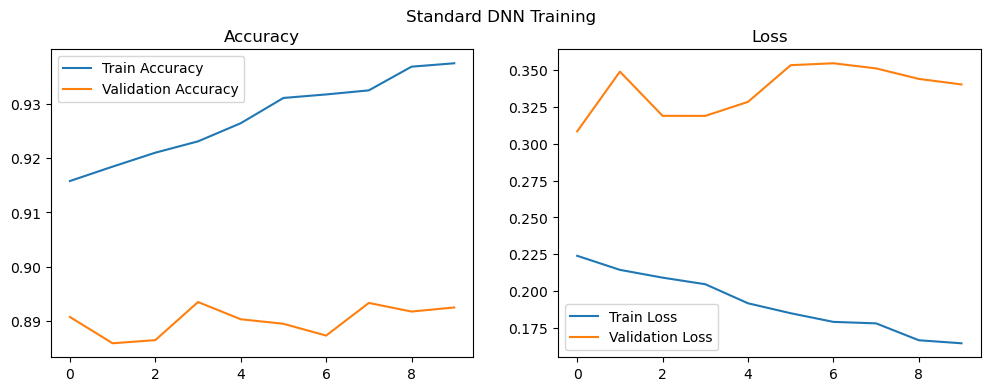

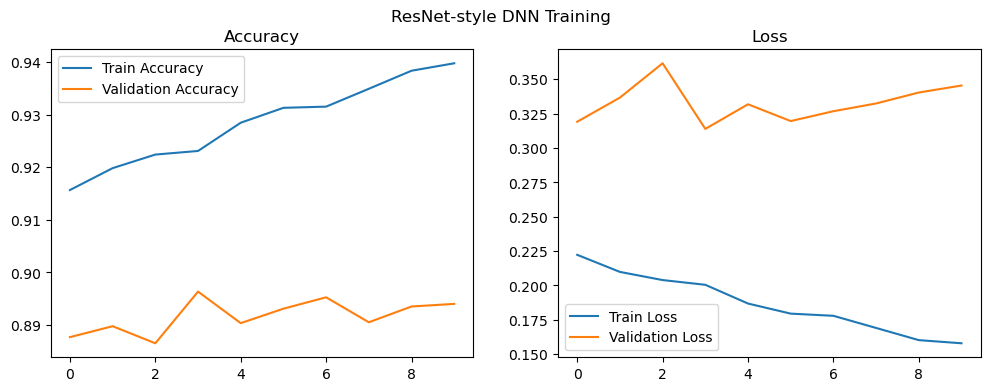

In [20]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [21]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [22]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8907
ResNet-style DNN Test Accuracy: 0.8925



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


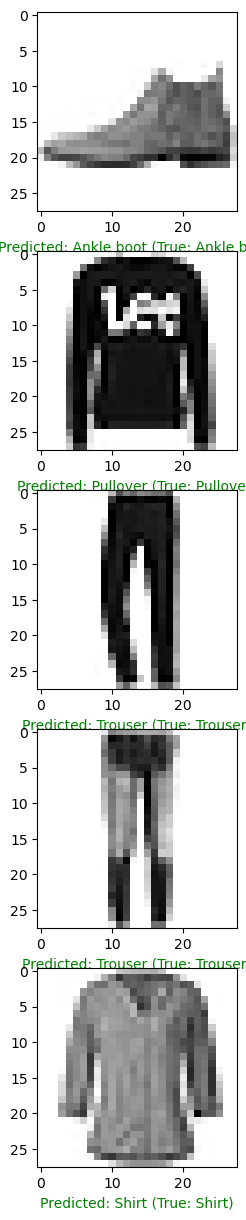


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


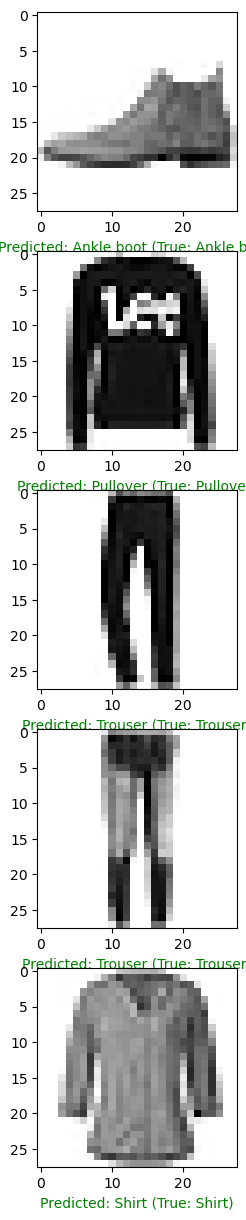

In [23]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)

ASSIGNMENT

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical


In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [28]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


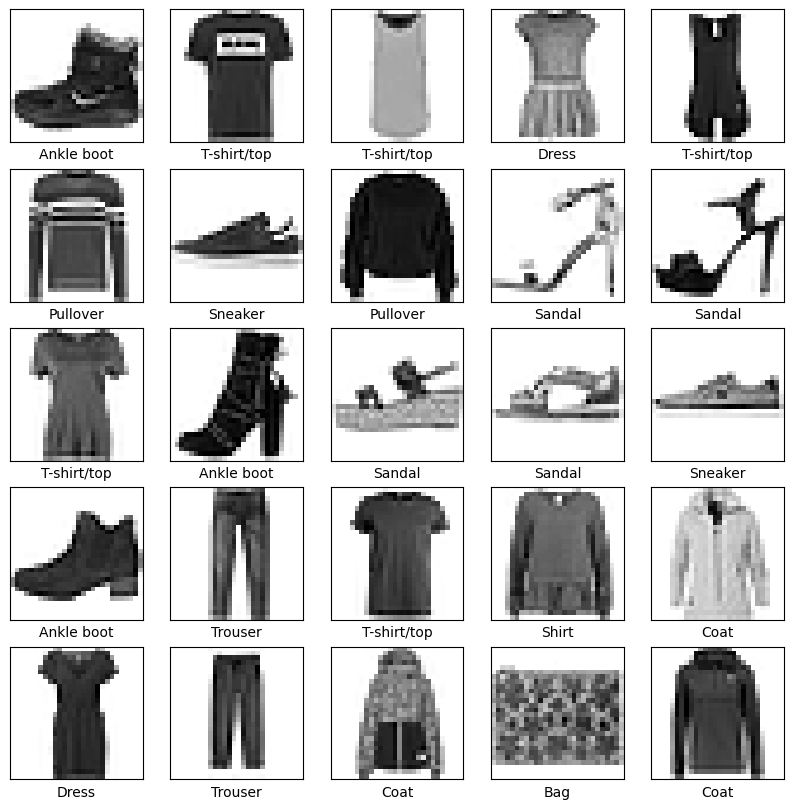

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


In [31]:
from tensorflow.keras.layers import LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

def create_dnn_improved():
    inputs = Input(shape=(784,))
    
    x = Dense(512, kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)
def create_resnet_dnn_improved():
    inputs = Input(shape=(784,))
    
    x = Dense(256, kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.4)(x)

    # Residual Block 1
    x1 = Dense(256, kernel_regularizer=l2(1e-4))(x)
    x1 = BatchNormalization()(x1)
    x1 = LeakyReLU()(x1)
    x1 = Dropout(0.3)(x1)

    x2 = Dense(256, kernel_regularizer=l2(1e-4))(x1)
    x2 = BatchNormalization()(x2)

    res1 = Add()([x, x2])
    res1 = LeakyReLU()(res1)
    res1 = Dropout(0.3)(res1)

    # Residual Block 2
    x3 = Dense(128, kernel_regularizer=l2(1e-4))(res1)
    x3 = BatchNormalization()(x3)
    x3 = LeakyReLU()(x3)
    x3 = Dropout(0.2)(x3)

    x4 = Dense(128, kernel_regularizer=l2(1e-4))(x3)
    x4 = BatchNormalization()(x4)

    res1_proj = Dense(128)(res1)
    res2 = Add()([res1_proj, x4])
    res2 = LeakyReLU()(res2)
    res2 = Dropout(0.2)(res2)

    # Residual Block 3
    x5 = Dense(128, kernel_regularizer=l2(1e-4))(res2)
    x5 = BatchNormalization()(x5)
    x5 = LeakyReLU()(x5)
    x5 = Dropout(0.2)(x5)

    x6 = Dense(128, kernel_regularizer=l2(1e-4))(x5)
    x6 = BatchNormalization()(x6)

    res2_proj = Dense(128)(res2)
    res3 = Add()([res2_proj, x6])
    res3 = LeakyReLU()(res3)
    res3 = Dropout(0.1)(res3)

    # Residual Block 4
    x7 = Dense(64, kernel_regularizer=l2(1e-4))(res3)
    x7 = BatchNormalization()(x7)
    x7 = LeakyReLU()(x7)
    x7 = Dropout(0.1)(x7)

    x8 = Dense(64, kernel_regularizer=l2(1e-4))(x7)
    x8 = BatchNormalization()(x8)

    res3_proj = Dense(64)(res3)
    res4 = Add()([res3_proj, x8])
    res4 = LeakyReLU()(res4)
    res4 = Dropout(0.1)(res4)

    # Final
    x_final = Dense(64, activation='relu')(res4)
    x_final = BatchNormalization()(x_final)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)


In [32]:

model = create_resnet_dnn_improved()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]


In [34]:
history = model.fit(
    x_train_flat, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/50


375/375 - 9s - 23ms/step - accuracy: 0.7182 - loss: 0.9828 - val_accuracy: 0.8342 - val_loss: 0.6153
Epoch 2/50


375/375 - 4s - 9ms/step - accuracy: 0.8138 - loss: 0.6835 - val_accuracy: 0.8550 - val_loss: 0.5545
Epoch 3/50
375/375 - 3s - 9ms/step - accuracy: 0.8332 - loss: 0.6267 - val_accuracy: 0.8517 - val_loss: 0.5580
Epoch 4/50


375/375 - 3s - 9ms/step - accuracy: 0.8428 - loss: 0.5849 - val_accuracy: 0.8593 - val_loss: 0.5312
Epoch 5/50


375/375 - 3s - 9ms/step - accuracy: 0.8510 - loss: 0.5600 - val_accuracy: 0.8647 - val_loss: 0.5110
Epoch 6/50
375/375 - 3s - 8ms/step - accuracy: 0.8532 - loss: 0.5396 - val_accuracy: 0.8546 - val_loss: 0.5272
Epoch 7/50


375/375 - 3s - 8ms/step - accuracy: 0.8570 - loss: 0.5201 - val_accuracy: 0.8668 - val_loss: 0.4880
Epoch 8/50


375/375 - 3s - 9ms/step - accuracy: 0.8613 - loss: 0.5050 - val_accuracy: 0.8719 - val_loss: 0.4638
Epoch 9/50
375/375 - 4s - 11ms/step - accuracy: 0.8630 - loss: 0.4911 - val_accuracy: 0.8661 - val_loss: 0.4792
Epoch 10/50


375/375 - 4s - 10ms/step - accuracy: 0.8649 - loss: 0.4792 - val_accuracy: 0.8736 - val_loss: 0.4618
Epoch 11/50


375/375 - 3s - 9ms/step - accuracy: 0.8698 - loss: 0.4630 - val_accuracy: 0.8755 - val_loss: 0.4523
Epoch 12/50


375/375 - 5s - 13ms/step - accuracy: 0.8713 - loss: 0.4519 - val_accuracy: 0.8792 - val_loss: 0.4383
Epoch 13/50


375/375 - 4s - 10ms/step - accuracy: 0.8738 - loss: 0.4421 - val_accuracy: 0.8804 - val_loss: 0.4239
Epoch 14/50
375/375 - 4s - 10ms/step - accuracy: 0.8735 - loss: 0.4368 - val_accuracy: 0.8785 - val_loss: 0.4200
Epoch 15/50


375/375 - 4s - 9ms/step - accuracy: 0.8761 - loss: 0.4262 - val_accuracy: 0.8821 - val_loss: 0.4148
Epoch 16/50
375/375 - 3s - 9ms/step - accuracy: 0.8795 - loss: 0.4136 - val_accuracy: 0.8814 - val_loss: 0.4091
Epoch 17/50
375/375 - 3s - 9ms/step - accuracy: 0.8794 - loss: 0.4117 - val_accuracy: 0.8691 - val_loss: 0.4447
Epoch 18/50
375/375 - 4s - 11ms/step - accuracy: 0.8794 - loss: 0.4075 - val_accuracy: 0.8760 - val_loss: 0.4132
Epoch 19/50


375/375 - 5s - 13ms/step - accuracy: 0.8820 - loss: 0.3955 - val_accuracy: 0.8838 - val_loss: 0.3856
Epoch 20/50
375/375 - 3s - 9ms/step - accuracy: 0.8818 - loss: 0.3917 - val_accuracy: 0.8739 - val_loss: 0.4137
Epoch 21/50
375/375 - 4s - 10ms/step - accuracy: 0.8833 - loss: 0.3884 - val_accuracy: 0.8772 - val_loss: 0.4146
Epoch 22/50


375/375 - 4s - 12ms/step - accuracy: 0.8869 - loss: 0.3796 - val_accuracy: 0.8857 - val_loss: 0.3856
Epoch 23/50
375/375 - 4s - 10ms/step - accuracy: 0.8879 - loss: 0.3712 - val_accuracy: 0.8836 - val_loss: 0.3852
Epoch 24/50
375/375 - 4s - 10ms/step - accuracy: 0.8862 - loss: 0.3732 - val_accuracy: 0.8776 - val_loss: 0.3976
Epoch 25/50
375/375 - 4s - 11ms/step - accuracy: 0.8860 - loss: 0.3694 - val_accuracy: 0.8856 - val_loss: 0.3735
Epoch 26/50
375/375 - 4s - 11ms/step - accuracy: 0.8885 - loss: 0.3648 - val_accuracy: 0.8857 - val_loss: 0.3846
Epoch 27/50


375/375 - 4s - 10ms/step - accuracy: 0.8883 - loss: 0.3622 - val_accuracy: 0.8882 - val_loss: 0.3669
Epoch 28/50
375/375 - 4s - 9ms/step - accuracy: 0.8906 - loss: 0.3586 - val_accuracy: 0.8850 - val_loss: 0.3798
Epoch 29/50
375/375 - 4s - 10ms/step - accuracy: 0.8905 - loss: 0.3566 - val_accuracy: 0.8860 - val_loss: 0.3730
Epoch 30/50


375/375 - 4s - 12ms/step - accuracy: 0.8913 - loss: 0.3560 - val_accuracy: 0.8918 - val_loss: 0.3684
Epoch 31/50
375/375 - 4s - 11ms/step - accuracy: 0.8912 - loss: 0.3529 - val_accuracy: 0.8875 - val_loss: 0.3664
Epoch 32/50
375/375 - 5s - 13ms/step - accuracy: 0.8927 - loss: 0.3499 - val_accuracy: 0.8858 - val_loss: 0.3700
Epoch 33/50
375/375 - 5s - 12ms/step - accuracy: 0.8945 - loss: 0.3439 - val_accuracy: 0.8843 - val_loss: 0.3756
Epoch 34/50
375/375 - 4s - 11ms/step - accuracy: 0.8949 - loss: 0.3422 - val_accuracy: 0.8889 - val_loss: 0.3679
Epoch 35/50
375/375 - 4s - 10ms/step - accuracy: 0.8950 - loss: 0.3422 - val_accuracy: 0.8859 - val_loss: 0.3767
Epoch 36/50
375/375 - 4s - 10ms/step - accuracy: 0.8949 - loss: 0.3416 - val_accuracy: 0.8875 - val_loss: 0.3758


In [35]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

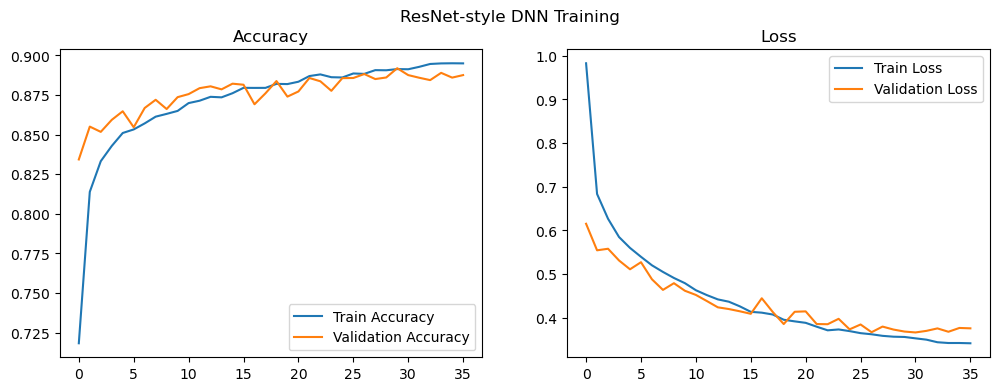

In [38]:

plot_history(history, 'ResNet-style DNN Training')


In [39]:
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [40]:
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

ResNet-style DNN Test Accuracy: 0.8925


In [41]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


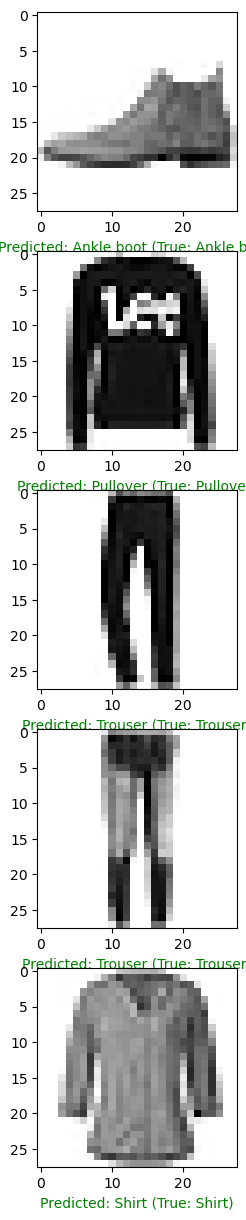

In [42]:
print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)